In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread, imsave

In [11]:
path_ext = '/media/guillermo/Expansion/Thesis GY/3. Analyzed files'
folder_results = 'results'

scopes = {'Tweez scope': 'TiTweez', 'Ti scope': 'Ti'}
dnas = {'pLPT20&pLPT41': 'pLPT20&41', 'pLPT119&pLPT41': 'pLPT119&41', 'pAAA': 'pAAA', 'pLPT107&pLPT41': 'pLPT107&41'}

exp_sum = pd.read_excel('../Exps_summary.xlsx')
exp_sum['formatted_dates'] = exp_sum['Date'].dt.strftime('%Y_%m_%d')
#positions = pd.read_excel('../Positions.xlsx')
df = pd.read_excel('../data_processed.xlsx')
exp_sum

,Date,Machine,Strain,DNA,Chemical,Dilution,formatted_dates
0,2023-11-15,Ti scope,MC4100 & DHL708,pLPT20&pLPT41,-,10^(-5),2023_11_15
1,2023-11-15,Tweez scope,MC4100 & DHL708,pLPT20&pLPT41,-,10^(-6),2023_11_15
2,2023-11-17,Ti scope,DHL708,pLPT119&pLPT41,-,10^(-5),2023_11_17
3,2023-11-17,Tweez scope,MC4100 & DHL708,pLPT119&pLPT41,-,10^(-6),2023_11_17
4,2023-11-28,Ti scope,MC4100 & MG1655,pAAA,-,10^(-6),2023_11_28
5,2023-11-28,Tweez scope,MG1655,pAAA,-,10^(-5),2023_11_28
6,2023-11-30,Ti scope,MC4100,pAAA,-,10^(-6),2023_11_30
7,2023-11-30,Tweez scope,MC4100,pAAA,-,10^(-5),2023_11_30
8,2023-12-04,Ti scope,MC4100,pLPT107&pLPT41,IPTG,10^(-6),2023_12_04
9,2023-12-04,Tweez scope,MC4100,pLPT107&pLPT41,IPTG,10^(-5),2023_12_04


In [12]:
# selected experiments
# comparing the effects of IPTG and aTc
# 2023-12-04	Tweez scope	MC4100	pLPT107&pLPT41	IPTG
# 2023-12-06	Tweez scope	MC4100	pLPT20&pLPT41	IPTG
# 2023-12-08	Ti scope	MC4100	pLPT107&pLPT41	aTc
# 2023-12-08	Tweez scope	MC4100	pLPT20&pLPT41	aTc

No chemical pos 0
im read
edt read


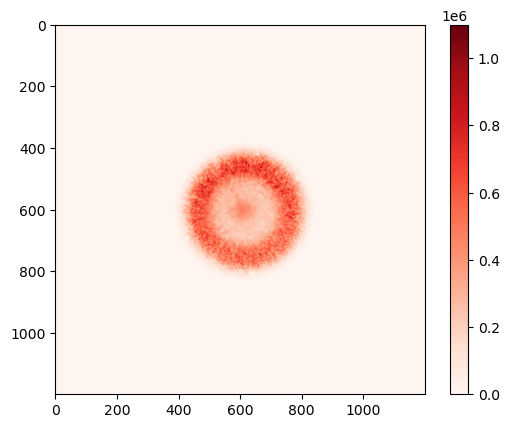

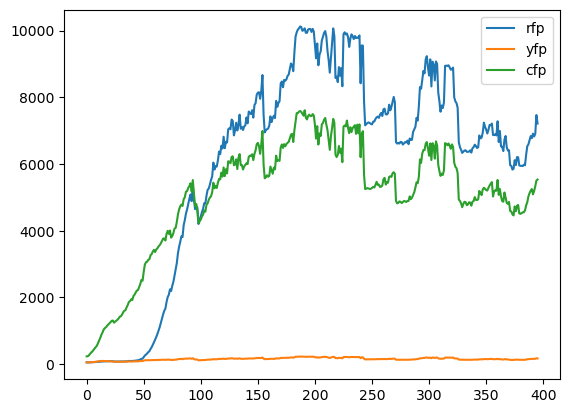

plot done
No chemical pos 1
im read
edt read


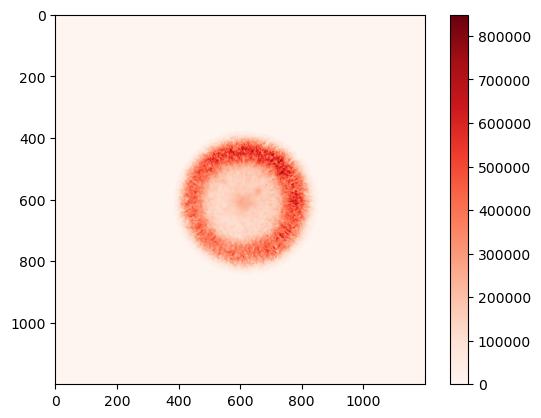

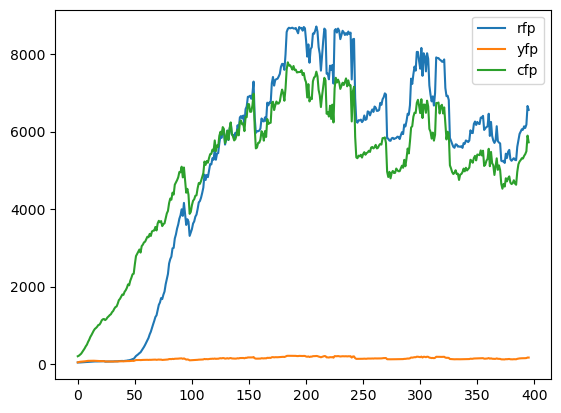

plot done
No chemical pos 2
im read
edt read


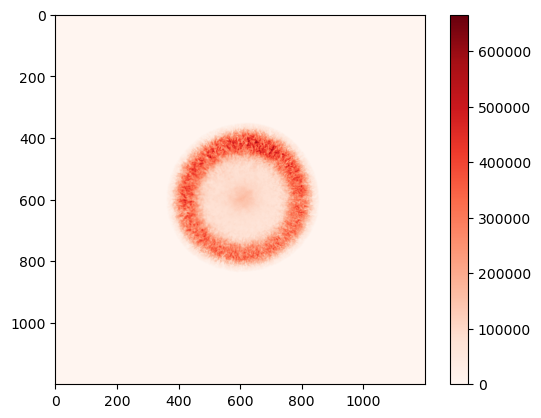

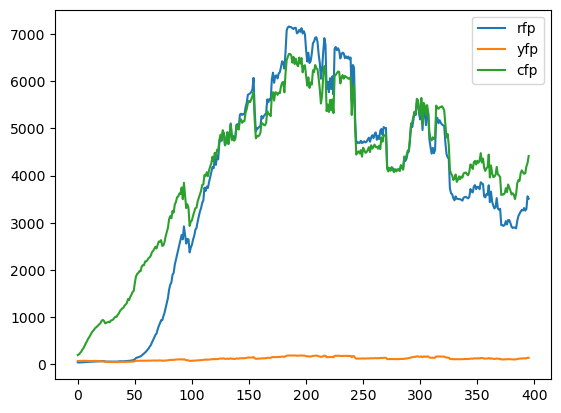

plot done
No chemical pos 5
im read
edt read


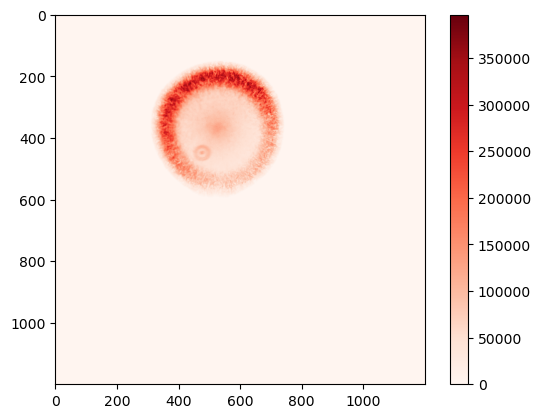

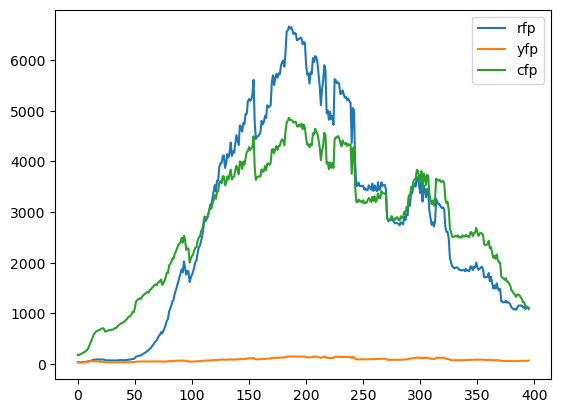

plot done
No chemical pos 6
im read
edt read


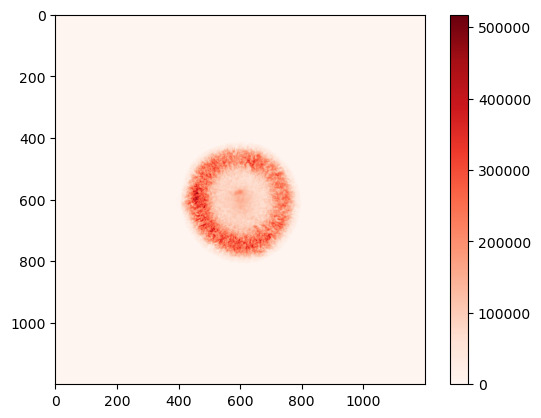

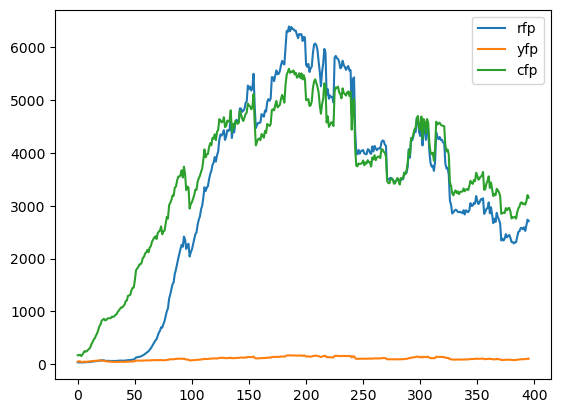

plot done
No chemical pos 35
im read
edt read


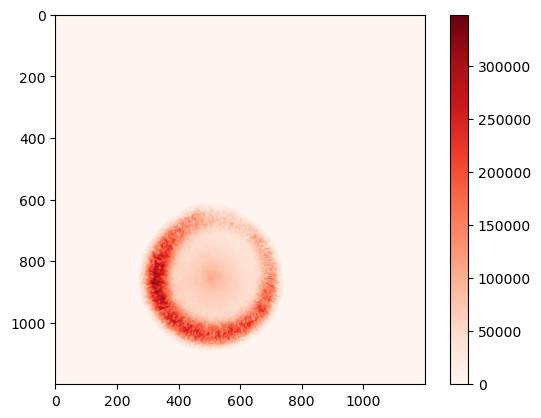

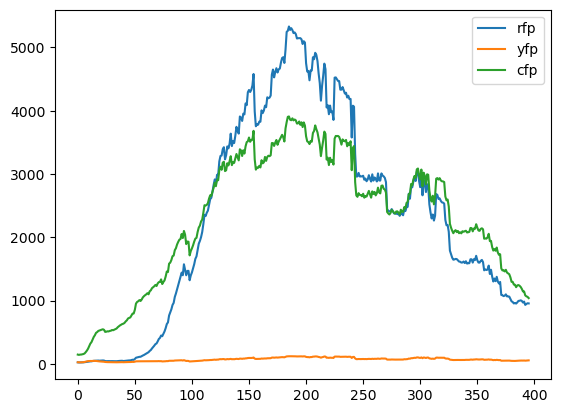

plot done
Chemical pos 9


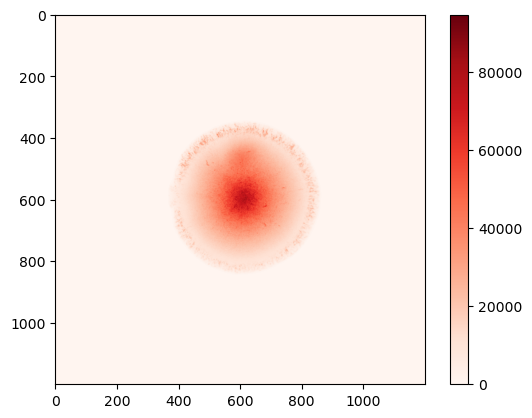

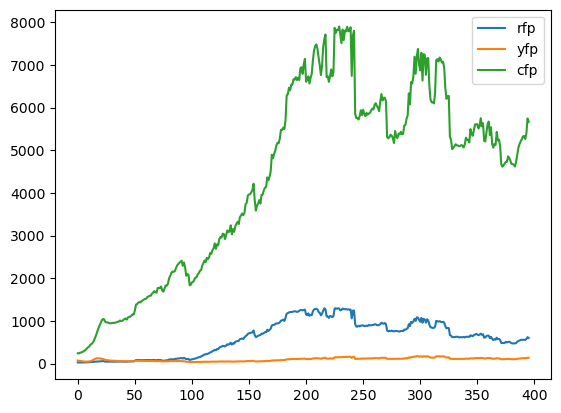

Chemical pos 14


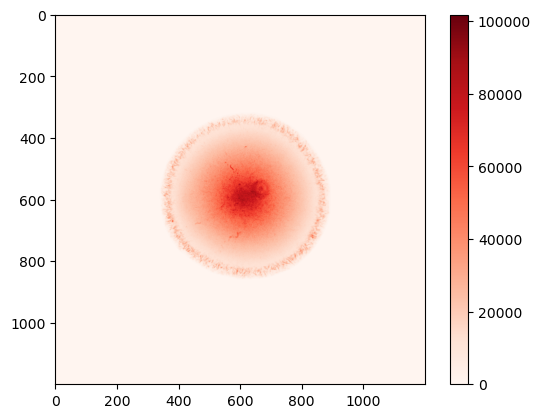

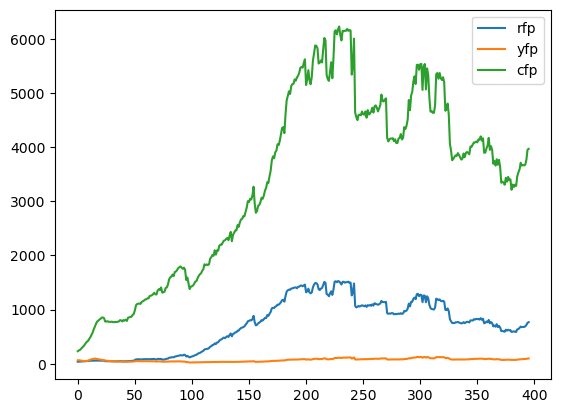

Chemical pos 16


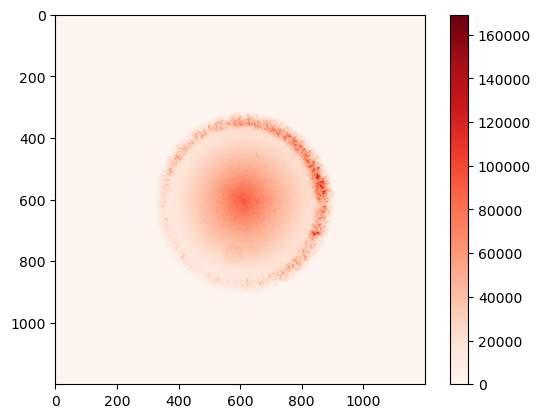

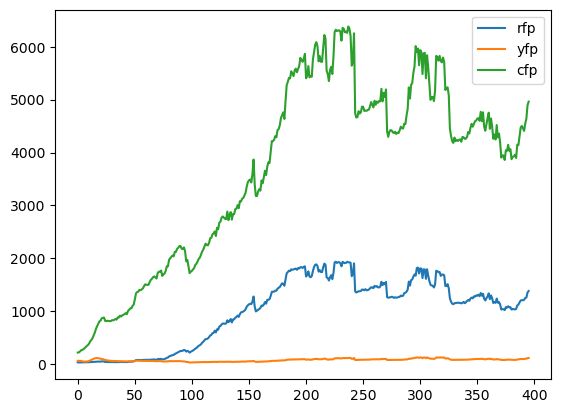

Chemical pos 17


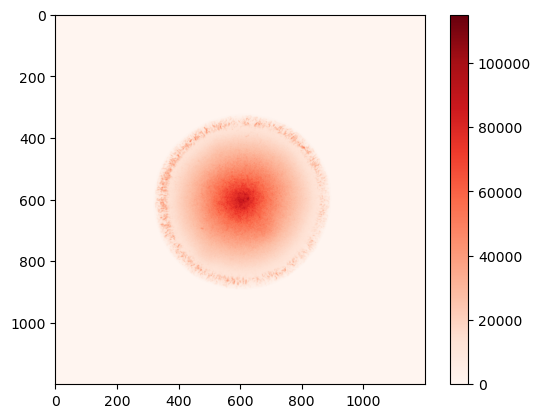

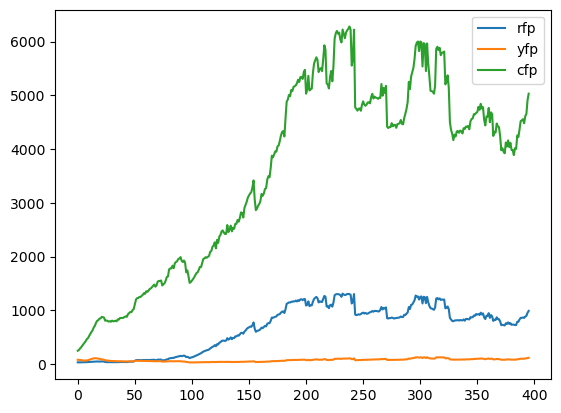

Chemical pos 19


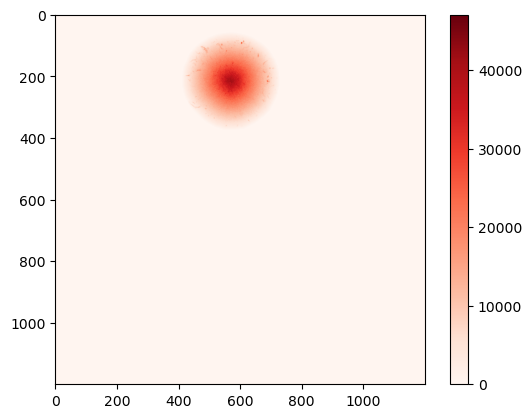

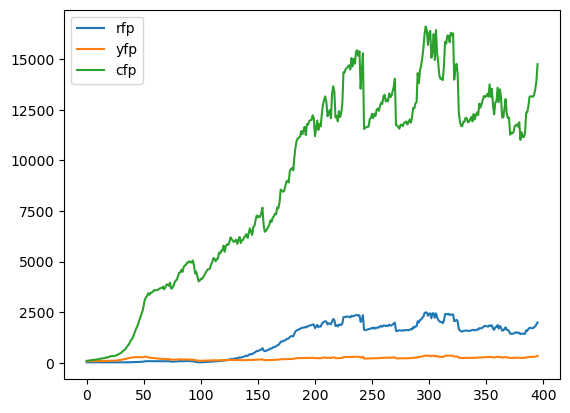

Chemical pos 21


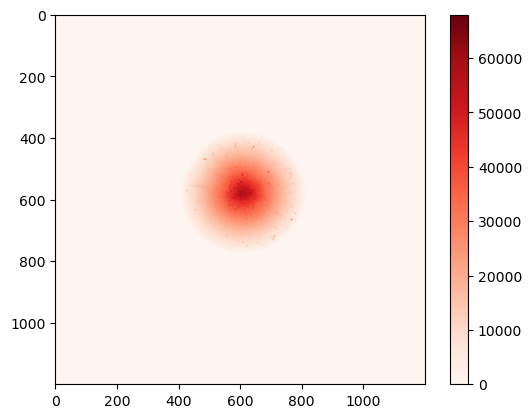

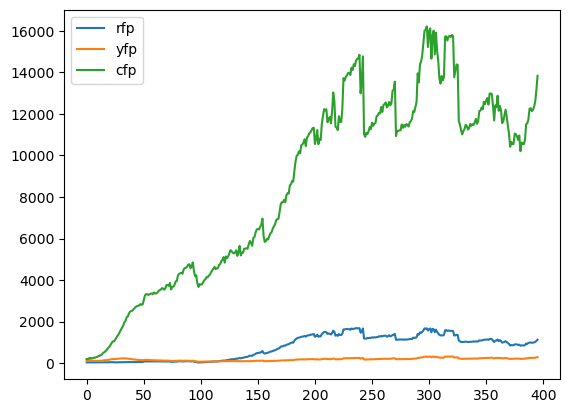

Chemical pos 23


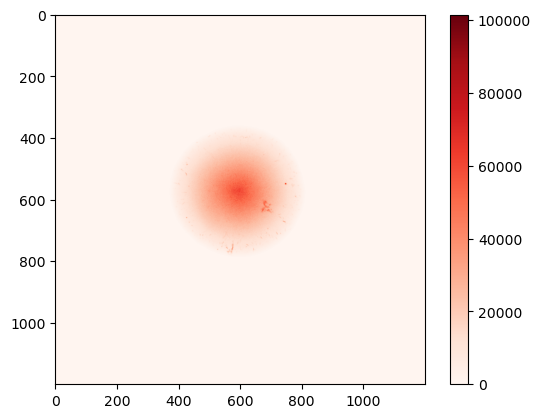

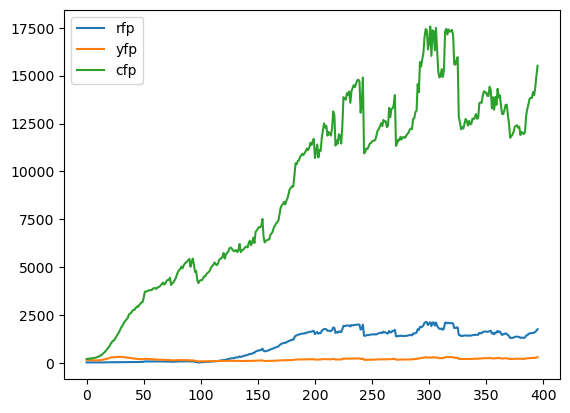

Chemical pos 24


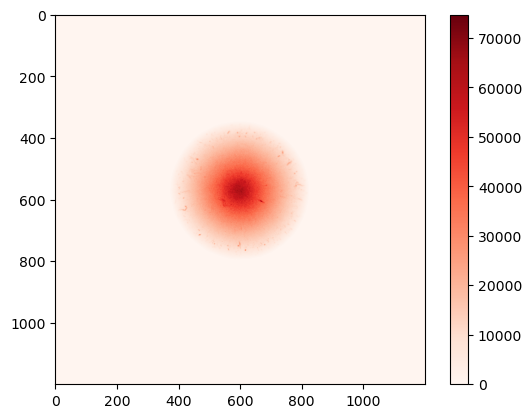

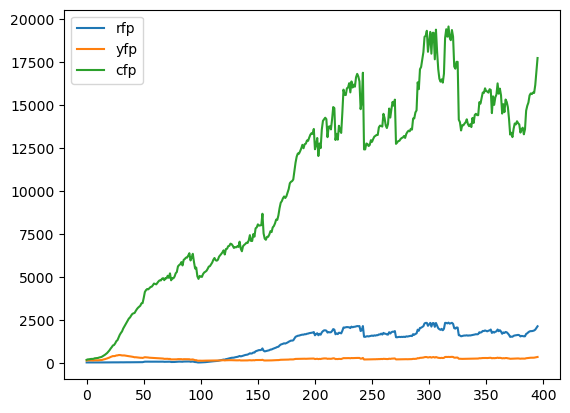

Chemical pos 25


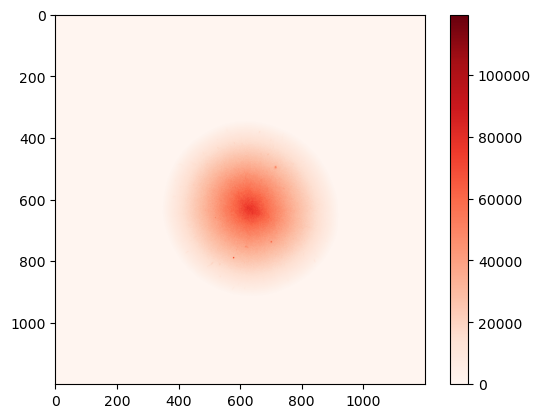

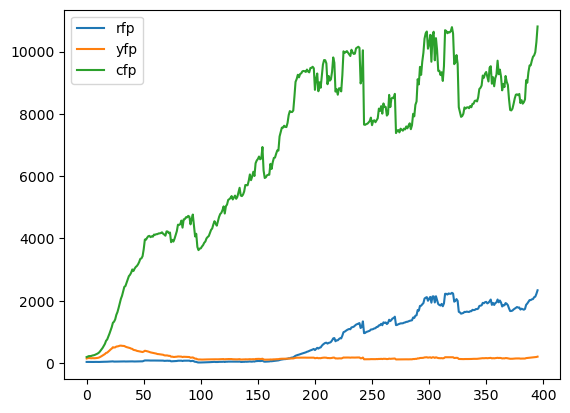

Chemical pos 28


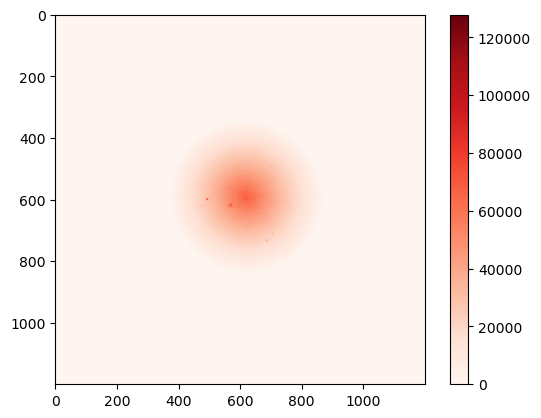

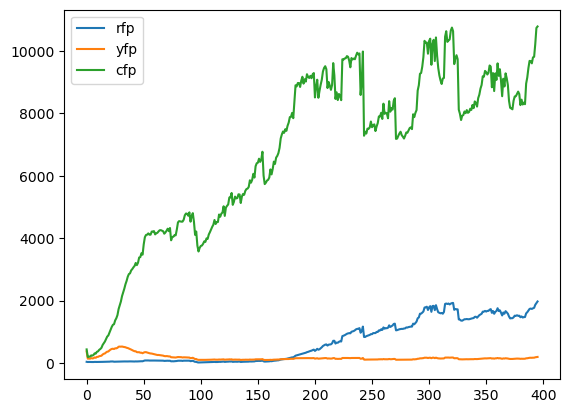

Chemical pos 30


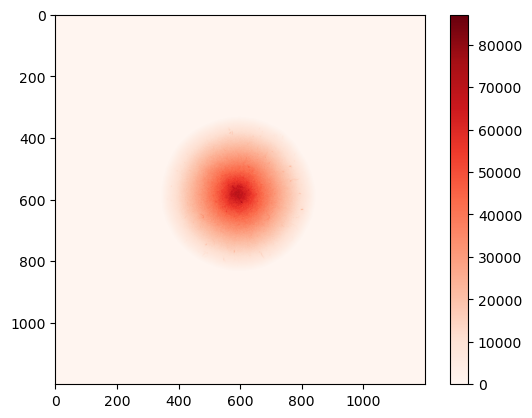

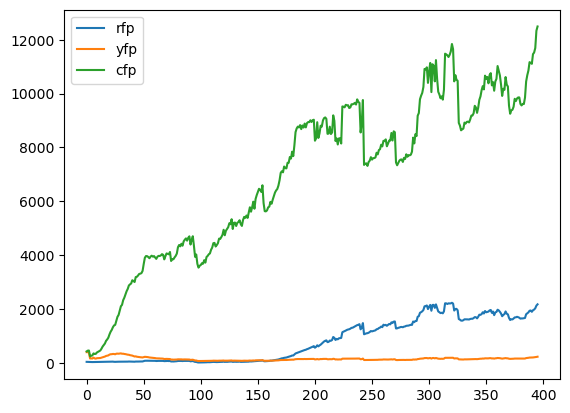

Chemical pos 31


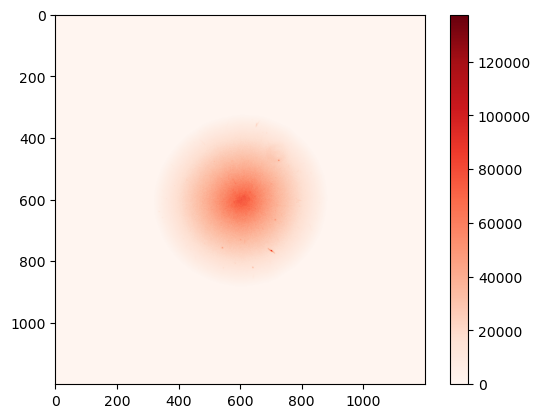

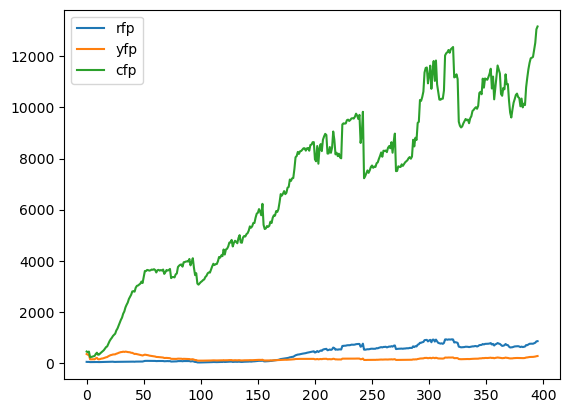

Chemical pos 32


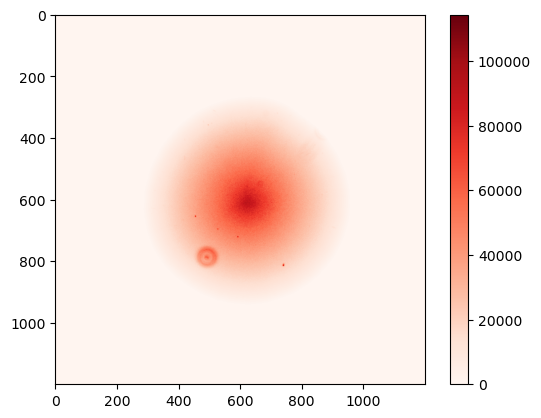

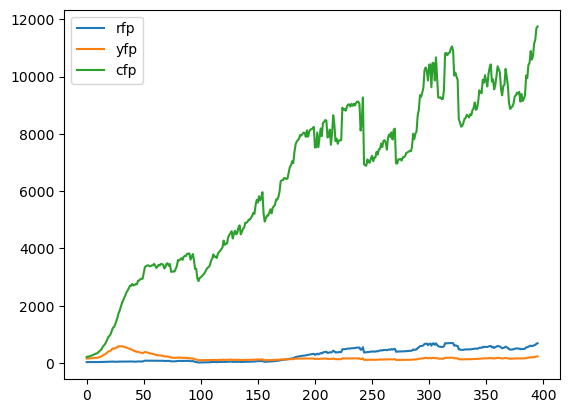

Chemical pos 34


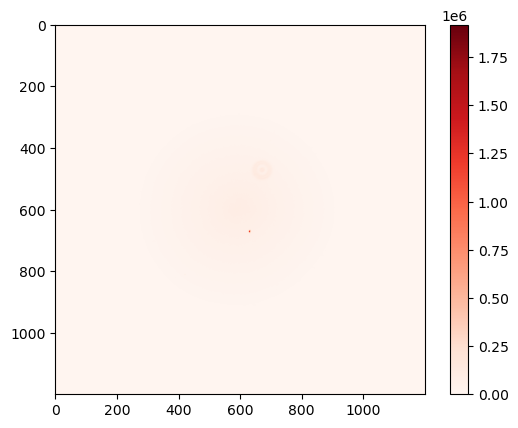

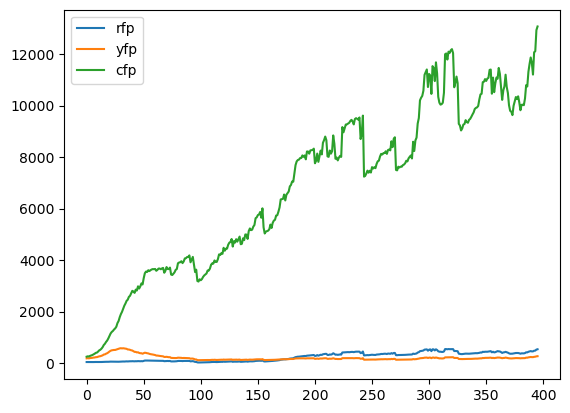

In [6]:
for i in [11]:#[9,10,11,12]    
    exp_date = exp_sum.loc[i,'formatted_dates']
    vector = exp_sum.loc[i,'DNA']
    scope_name = exp_sum.loc[i,'Machine']
    chem = exp_sum.loc[i,'Chemical']
    
    
    path_scope = os.path.join(path_ext, scope_name)
    path = os.path.join(path_scope, exp_date)
    
    df_pos_nochem = df[(df.Date == exp_sum.loc[i, 'Date']) & 
                (df.DNA == vector) & 
                (df.Machine == scope_name) &
                (df.Chemical == chem+'-')]
    df_pos_chem = df[(df.Date == exp_sum.loc[i, 'Date']) & 
                (df.DNA == vector) & 
                (df.Machine == scope_name) &
                (df.Chemical == chem+'+')]

    if vector == 'pLPT20&pLPT41' or vector == 'pLPT119&pLPT41':
        yfp_chn = 0
        cfp_chn = 1
        ph_chn = 2
        fluo_chns = 2
    else:
        rfp_chn = 0
        yfp_chn = 1
        cfp_chn = 2
        ph_chn = 3
        fluo_chns = 3
    nt = 396
    mean_fluo_nc = np.zeros((len(df_pos_nochem), nt,fluo_chns))
    mean_fluo_c = np.zeros((len(df_pos_chem), nt,fluo_chns))

    # all positions without chemical
    for j, pos in enumerate(df_pos_nochem.Position.unique()):
        print(f"No chemical pos {pos}")
        path_results = os.path.join(path,folder_results, f"pos{pos}")
        fname = f'{exp_date}_10x_1.0x_{dnas[vector]}_{scopes[scope_name]}_Pos{pos}.ome.tif'
        
        im_all = imread(os.path.join(path,fname)).astype(float)
        im_all = im_all[:nt,:,:,:]
        print("im read")
        nt,nx,ny,nc = im_all.shape
        
        bg = np.zeros((fluo_chns,))
        for c in range(fluo_chns):
            bg[c] = im_all[0,:100,:100,c].mean()
        """
        im = np.zeros_like(im_all)
        for c in range(fluo_chns):
            im[:,:,:,c] = im_all[:,:,:,c] - bg[c]
        im[:,:,:,ph_chn] = im_all[:,:,:,ph_chn]
        print("bg substracted")
        """
        edt = np.load(os.path.join(path_results,'edt.npy'))
        edt = edt[:nt,:,:]
        print("edt read")

        if fluo_chns == 3:
            # just for visualization
            plt.imshow(im_all[100,:,:,0]*edt[100,:,:],cmap='Reds')
            plt.colorbar()
            plt.show()
            
            for t in np.arange(nt):
                for c in np.arange(fluo_chns):
                    mean_fluo_nc[j,t,c] = (im_all[t,edt[t,:,:]>0,c] - bg[c]).mean()
            plt.plot(mean_fluo_nc[j,:,0],label='rfp')
            plt.plot(mean_fluo_nc[j,:,1],label='yfp')
            plt.plot(mean_fluo_nc[j,:,2],label='cfp')
            plt.legend()
            plt.show()
        elif fluo_chns == 2:
            # just for visualization
            plt.imshow(im_all[100,:,:,0]*edt[100,:,:],cmap='Greens')
            plt.colorbar()
            plt.show()
            
            for t in np.arange(nt):
                for c in np.arange(fluo_chns):
                    mean_fluo_nc[j,t,c] = im[t,edt[t,:,:]>0,c].mean()
            plt.plot(mean_fluo_nc[j,:,0],label='yfp')
            plt.plot(mean_fluo_nc[j,:,1],label='cfp')
            #plt.plot(mean_fluo_nc[j,:,2],label='cfp')
            plt.legend()
            plt.show()
        print("plot done")
        del im_all
        #del im
        del edt
        
    # all positions with chemical
    for j, pos in enumerate(df_pos_chem.Position.unique()):
        print(f"Chemical pos {pos}")
        path_results = os.path.join(path,folder_results, f"pos{pos}")
        fname = f'{exp_date}_10x_1.0x_{dnas[vector]}_{scopes[scope_name]}_Pos{pos}.ome.tif'
        
        im_all = imread(os.path.join(path,fname)).astype(float)
        im_all = im_all[:nt,:,:,:]
        nt,nx,ny,nc = im_all.shape
        
        bg = np.zeros((fluo_chns,))
        for c in range(fluo_chns):
            bg[c] = im_all[0,:100,:100,c].mean()

        """
        im = np.zeros_like(im_all)
        for c in range(fluo_chns):
            im[:,:,:,c] = im_all[:,:,:,c] - bg[c]
        im[:,:,:,ph_chn] = im_all[:,:,:,ph_chn]
        """
        edt = np.load(os.path.join(path_results,'edt.npy'))
        edt = edt[:nt,:,:]

        if fluo_chns == 3:
            # just for visualization
            plt.imshow(im_all[100,:,:,0]*edt[100,:,:],cmap='Reds')
            plt.colorbar()
            plt.show()
            
            for t in np.arange(nt):
                for c in np.arange(fluo_chns):
                    mean_fluo_c[j,t,c] = (im_all[t,edt[t,:,:]>0,c] - bg[c]).mean()
            plt.plot(mean_fluo_c[j,:,0],label='rfp')
            plt.plot(mean_fluo_c[j,:,1],label='yfp')
            plt.plot(mean_fluo_c[j,:,2],label='cfp')
            plt.legend()
            plt.show()
        elif fluo_chns == 2:
            # just for visualization
            plt.imshow(im_all[100,:,:,0]*edt[100,:,:],cmap='Greens')
            plt.colorbar()
            plt.show()
            
            for t in np.arange(nt):
                for c in np.arange(fluo_chns):
                    mean_fluo_c[j,t,c] = im[t,edt[t,:,:]>0,c].mean()
            plt.plot(mean_fluo_c[j,:,0],label='yfp')
            plt.plot(mean_fluo_c[j,:,1],label='cfp')
            #plt.plot(mean_fluo_c[j,:,2],label='cfp')
            plt.legend()
            plt.show()
        del im_all
        #del im
        del edt

In [13]:
## From file
"""
exp_date = '2023_12_06'
scope_name = 'Tweez scope'
vector = 'pLPT20&pLPT41'
chem = 'IPTG'
mean_fluo_nc = np.load(f'mean_fluo_nc_{exp_date}_{scope_name}.npy')
mean_fluo_c = np.load(f'mean_fluo_c_{exp_date}_{scope_name}.npy')
fluo_chns = 2
"""

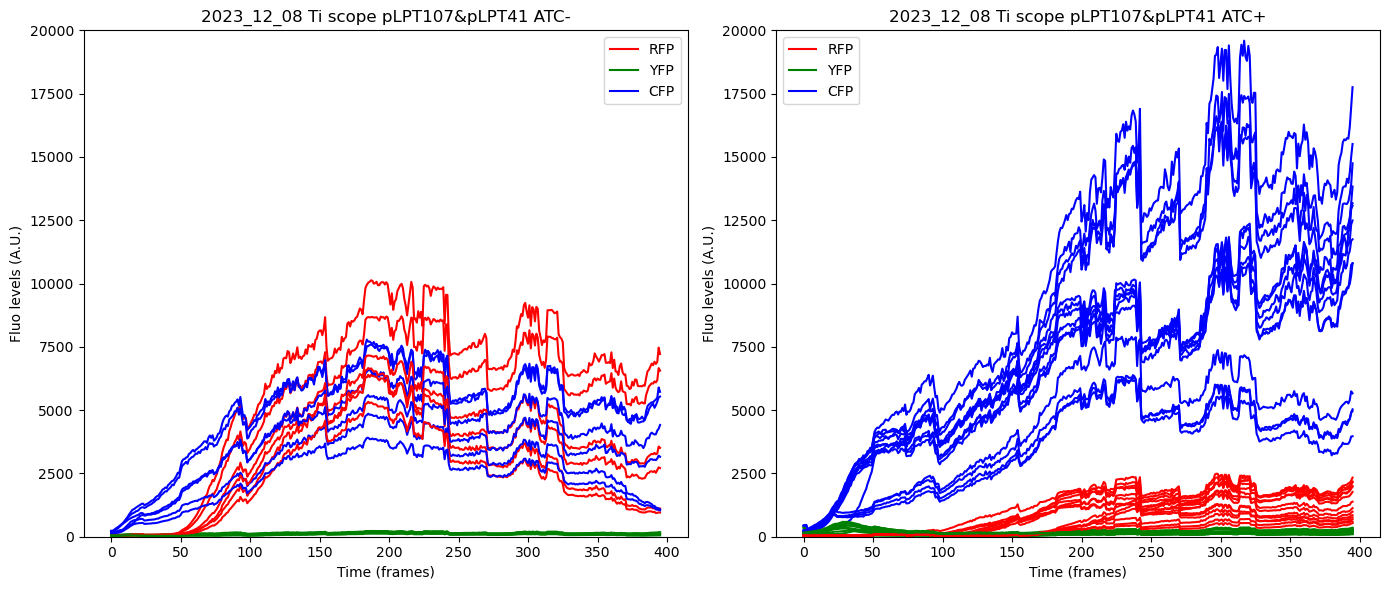

In [7]:
# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first set of data (IPTG-)
ncolnc, ntnc, ncnc = mean_fluo_nc.shape
if fluo_chns == 3:
    for col in np.arange(ncolnc):
        axs[0].plot(mean_fluo_nc[col,:,0], 'r-', label='RFP' if col == 0 else "")
        axs[0].plot(mean_fluo_nc[col,:,1], 'g-', label='YFP' if col == 0 else "")
        axs[0].plot(mean_fluo_nc[col,:,2], 'b-', label='CFP' if col == 0 else "")
elif fluo_chns == 2:
    for col in np.arange(ncolnc):
        axs[0].plot(mean_fluo_nc[col,:,0], 'g-', label='YFP' if col == 0 else "")
        axs[0].plot(mean_fluo_nc[col,:,1], 'b-', label='CFP' if col == 0 else "")
        #axs[0].plot(mean_fluo_nc[col,:,2], 'b-', label='CFP' if col == 0 else "")
axs[0].set_ylim([0, 20000])
axs[0].set_xlabel('Time (frames)')
axs[0].set_ylabel('Fluo levels (A.U.)')
axs[0].set_title(f'{exp_date} {scope_name} {vector} {chem}-')
axs[0].legend()

# Plot the second set of data (IPTG+)
ncolc, ntc, ncc = mean_fluo_c.shape

if fluo_chns == 3:
    for col in np.arange(ncolc):
        axs[1].plot(mean_fluo_c[col,:,0], 'r-', label='RFP' if col == 0 else "")
        axs[1].plot(mean_fluo_c[col,:,1], 'g-', label='YFP' if col == 0 else "")
        axs[1].plot(mean_fluo_c[col,:,2], 'b-', label='CFP' if col == 0 else "")
elif fluo_chns == 2:
    for col in np.arange(ncolc):
        axs[1].plot(mean_fluo_c[col,:,0], 'g-', label='YFP' if col == 0 else "")
        axs[1].plot(mean_fluo_c[col,:,1], 'b-', label='CFP' if col == 0 else "")
        #axs[1].plot(mean_fluo_c[col,:,2], 'b-', label='CFP' if col == 0 else "")
axs[1].set_ylim([0, 20000])
axs[1].set_xlabel('Time (frames)')
axs[1].set_ylabel('Fluo levels (A.U.)')
axs[1].set_title(f'{exp_date} {scope_name} {vector} {chem}+')
axs[1].legend()

# Adjust layout for better fit
plt.tight_layout()

# Show the combined plot
plt.show()


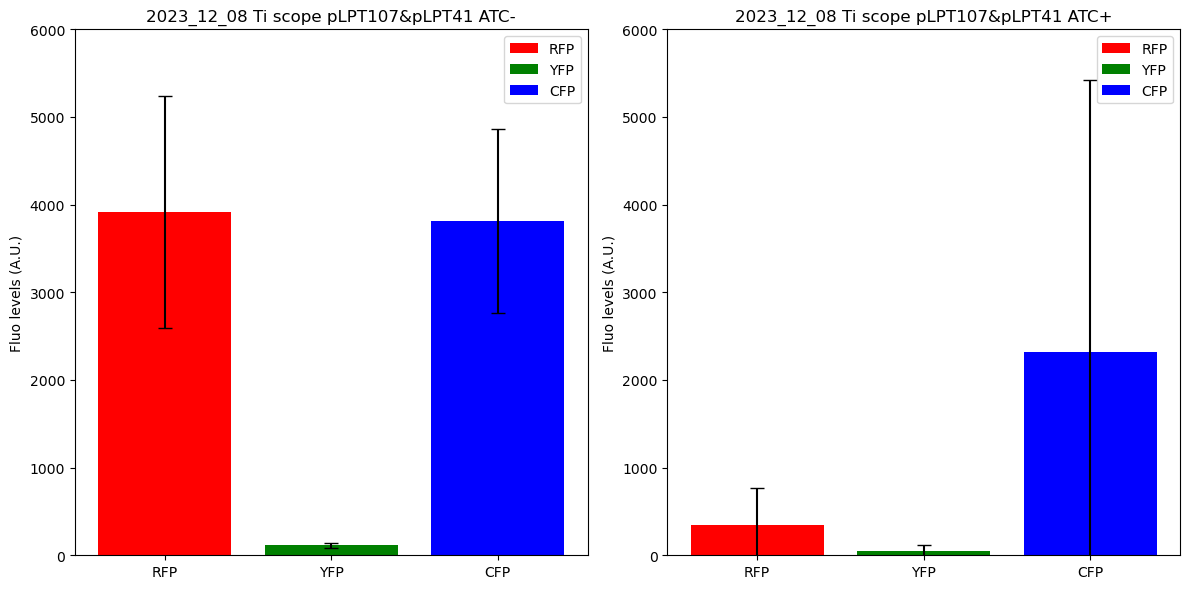

In [9]:
# Calculate the average fluorescence levels for the first dataset (IPTG-)
if fluo_chns == 2:
    ncolnc, ntnc, ncnc = mean_fluo_nc.shape
    av_fluo_nc = np.zeros((ncolnc, ncnc))
    for col in np.arange(ncolnc):
        av_fluo_nc[col, 0] = np.nanmean(mean_fluo_nc[col, :, 0])
        av_fluo_nc[col, 1] = np.nanmean(mean_fluo_nc[col, :, 1])
        #av_fluo_nc[col, 2] = mean_fluo_nc[col, :, 2].mean()
    
    # Calculate the average fluorescence levels for the second dataset (IPTG+)
    ncolc, ntc, ncc = mean_fluo_c.shape
    av_fluo_c = np.zeros((ncolc, ncc))
    for col in np.arange(ncolnc):  # Note: ncolnc should be ncolc for consistency with the dataset
        av_fluo_c[col, 0] = np.nanmean(mean_fluo_c[col, :, 0])
        av_fluo_c[col, 1] = np.nanmean(mean_fluo_c[col, :, 1])
        #av_fluo_c[col, 2] = mean_fluo_c[col, :, 2].mean()
    
    # Calculate the maximum y-limit across both datasets
    """
    max_ylim = max(
        av_fluo_nc.max() + av_fluo_nc.std(),
        av_fluo_c.max() + av_fluo_c.std()
    )
    """
    max_ylim = 6000
    
    # Create a figure and two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the first bar chart in the first subplot
    axs[0].bar(0, av_fluo_nc[:, 0].mean(), yerr=av_fluo_nc[:, 0].std(), color='Green', label='RFP', capsize=5)
    axs[0].bar(1, av_fluo_nc[:, 1].mean(), yerr=av_fluo_nc[:, 1].std(), color='Blue', label='CFP', capsize=5)
    axs[0].set_xticks([0, 1])
    axs[0].set_xticklabels(['YFP', 'CFP'])
    axs[0].set_ylabel('Fluo levels (A.U.)')
    axs[0].set_title(f'{exp_date} {scope_name} {vector} {chem}-')
    axs[0].legend()
    axs[0].set_ylim(0, max_ylim)  # Set the same y-limit
    
    # Plot the second bar chart in the second subplot
    axs[1].bar(0, av_fluo_c[:, 0].mean(), yerr=av_fluo_c[:, 0].std(), color='Green', label='RFP', capsize=5)
    axs[1].bar(1, av_fluo_c[:, 1].mean(), yerr=av_fluo_c[:, 1].std(), color='Blue', label='CFP', capsize=5)
    axs[1].set_xticks([0, 1])
    axs[1].set_xticklabels(['YFP', 'CFP'])
    axs[1].set_ylabel('Fluo levels (A.U.)')
    axs[1].set_title(f'{exp_date} {scope_name} {vector} {chem}+')
    axs[1].legend()
    axs[1].set_ylim(0, max_ylim)  # Set the same y-limit
    
    # Adjust layout for better fit
    plt.tight_layout()
    
    # Show the combined plot
    plt.show()

elif fluo_chns == 3:
    ncolnc, ntnc, ncnc = mean_fluo_nc.shape
    av_fluo_nc = np.zeros((ncolnc, ncnc))
    for col in np.arange(ncolnc):
        av_fluo_nc[col, 0] = np.nanmean(mean_fluo_nc[col, :, 0])
        av_fluo_nc[col, 1] = np.nanmean(mean_fluo_nc[col, :, 1])
        av_fluo_nc[col, 2] = np.nanmean(mean_fluo_nc[col, :, 2])
    
    # Calculate the average fluorescence levels for the second dataset (IPTG+)
    ncolc, ntc, ncc = mean_fluo_c.shape
    av_fluo_c = np.zeros((ncolc, ncc))
    for col in np.arange(ncolnc):  # Note: ncolnc should be ncolc for consistency with the dataset
        av_fluo_c[col, 0] = np.nanmean(mean_fluo_c[col, :, 0])
        av_fluo_c[col, 1] = np.nanmean(mean_fluo_c[col, :, 1])
        av_fluo_c[col, 2] = np.nanmean(mean_fluo_c[col, :, 2])
    
    # Calculate the maximum y-limit across both datasets
    """
    max_ylim = max(
        av_fluo_nc.max() + av_fluo_nc.std(),
        av_fluo_c.max() + av_fluo_c.std()
    )
    """
    max_ylim = 6000
    
    # Create a figure and two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the first bar chart in the first subplot
    axs[0].bar(0, av_fluo_nc[:, 0].mean(), yerr=av_fluo_nc[:, 0].std(), color='Red', label='RFP', capsize=5)
    axs[0].bar(1, av_fluo_nc[:, 1].mean(), yerr=av_fluo_nc[:, 1].std(), color='Green', label='YFP', capsize=5)
    axs[0].bar(2, av_fluo_nc[:, 2].mean(), yerr=av_fluo_nc[:, 2].std(), color='Blue', label='CFP', capsize=5)
    axs[0].set_xticks([0, 1, 2])
    axs[0].set_xticklabels(['RFP', 'YFP', 'CFP'])
    axs[0].set_ylabel('Fluo levels (A.U.)')
    axs[0].set_title(f'{exp_date} {scope_name} {vector} {chem}-')
    axs[0].legend()
    axs[0].set_ylim(0, max_ylim)  # Set the same y-limit
    
    # Plot the second bar chart in the second subplot
    axs[1].bar(0, av_fluo_c[:, 0].mean(), yerr=av_fluo_c[:, 0].std(), color='Red', label='RFP', capsize=5)
    axs[1].bar(1, av_fluo_c[:, 1].mean(), yerr=av_fluo_c[:, 1].std(), color='Green', label='YFP', capsize=5)
    axs[1].bar(2, av_fluo_c[:, 2].mean(), yerr=av_fluo_c[:, 2].std(), color='Blue', label='CFP', capsize=5)
    axs[1].set_xticks([0, 1, 2])
    axs[1].set_xticklabels(['RFP', 'YFP', 'CFP'])
    axs[1].set_ylabel('Fluo levels (A.U.)')
    axs[1].set_title(f'{exp_date} {scope_name} {vector} {chem}+')
    axs[1].legend()
    axs[1].set_ylim(0, max_ylim)  # Set the same y-limit
    
    # Adjust layout for better fit
    plt.tight_layout()
    
    # Show the combined plot
    plt.show()


In [10]:
np.save(f'mean_fluo_nc_{exp_date}_{scope_name}.npy', mean_fluo_nc)
np.save(f'mean_fluo_c_{exp_date}_{scope_name}.npy', mean_fluo_c)